In [5]:
#Importing Libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sb
from scipy import stats

In [25]:
#Importing Dataset
cars = pd.read_csv('mtcars.csv')
cars.head()

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4.0
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4.0
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1.0
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1.0
4,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1.0


In [26]:
#Correlation Check
cars.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.868568,-0.852814,-0.748228,0.667288,-0.876500,0.360249,0.613658,0.663963,0.478347,-0.522630
cyl,-0.868568,1.000000,0.903751,0.824572,-0.624963,0.836046,-0.509049,-0.763568,-0.602881,-0.447720,0.550555
disp,-0.852814,0.903751,1.000000,0.782530,-0.639821,0.911883,-0.381450,-0.666546,-0.628483,-0.515957,0.427725
hp,-0.748228,0.824572,0.782530,1.000000,-0.341566,0.664220,-0.729980,-0.715223,-0.270005,-0.053228,0.679056
drat,0.667288,-0.624963,-0.639821,-0.341566,1.000000,-0.692743,-0.136129,0.254395,0.754397,0.709622,0.015681
wt,-0.876500,0.836046,0.911883,0.664220,-0.692743,1.000000,-0.164970,-0.544813,-0.719961,-0.586132,0.460415
qsec,0.360249,-0.509049,-0.381450,-0.729980,-0.136129,-0.164970,1.000000,0.772690,-0.231449,-0.402919,-0.714429
vs,0.613658,-0.763568,-0.666546,-0.715223,0.254395,-0.544813,0.772690,1.000000,0.148310,0.084469,-0.661790
am,0.663963,-0.602881,-0.628483,-0.270005,0.754397,-0.719961,-0.231449,0.148310,1.000000,0.846195,-0.087063
gear,0.478347,-0.447720,-0.515957,-0.053228,0.709622,-0.586132,-0.402919,0.084469,0.846195,1.000000,0.159789


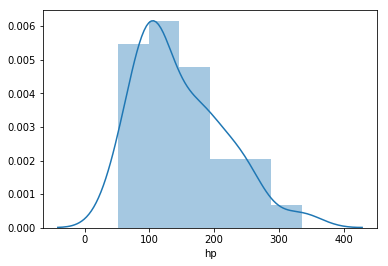

In [8]:
%matplotlib inline
sb.distplot(cars.hp)

In [9]:
#Splitting the dataset
X = cars.loc[:,['hp','wt','am']]
y = cars.mpg

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=14)

In [12]:
#Checking the shape of splitted dataset
print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

X_train shape: (26, 3)
X_test shape: (5, 3)
y_train shape: (26,)
y_test shape: (5,)


In [13]:
#Train the model
model = LinearRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

In [14]:
#Accuracy Check
r2_score(y_test,y_predict)

0.9347871683502342

In [15]:
y_test

2     22.8
18    30.4
15    10.4
3     21.4
26    26.0
Name: mpg, dtype: float64

In [16]:
y_predict

array([25.98032255, 29.23118176, 10.38484399, 19.74849811, 26.51357159])

# Optimize the Model

In [17]:
#Checking null values
cars.isnull().sum()

car_model    0
mpg          0
cyl          0
disp         0
hp           0
drat         0
wt           0
qsec         0
vs           0
am           0
gear         0
carb         1
dtype: int64

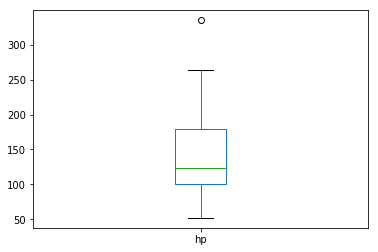

In [18]:
#Outlier Check
cars.hp.plot(kind='box')

In [19]:
cars[cars.hp==cars.hp.max()]

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
30,Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1,5,NaN


In [20]:
#Removing the outlier
updated_cars = cars.drop(index=30)
updated_cars

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4.0
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4.0
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1.0
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1.0
4,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1.0
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1.0
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4.0
7,Valiant 2,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1.0
8,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1.0
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4.0


In [21]:
X = updated_cars.loc[:,['hp','wt','am']]
y = updated_cars.mpg

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=14)

In [23]:
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)
y_predict = model_lr.predict(X_test)

In [24]:
r2_score(y_test,y_predict)

0.939354548657414